In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, auc, precision_recall_curve

In [2]:
def print_class_count(interictal_features_train, 
                      interictal_features_test,
                      preictal_features_train,
                      preictal_features_test
                     ):
    interictal_all = np.concatenate((interictal_features_train, 
                      interictal_features_test), axis=0)
    preictal_all = np.concatenate((preictal_features_train,
                      preictal_features_test), axis=0)
    print('Interictal:', interictal_all.shape[0])
    print('Preictal:', preictal_all.shape[0])
    print(f'Class ratio: {int(interictal_all.shape[0]/preictal_all.shape[0])}:1', end='\n\n')

def load_features():
    interictal_features_train = np.load('./interictal_train.npy')
    preictal_features_train = np.load('./preictal_train.npy')
    X_train = np.concatenate((interictal_features_train, preictal_features_train), axis=0)
    
    interictal_targets_train = -1*np.ones(interictal_features_train.shape[0])
    preictal_targets_train = np.ones(preictal_features_train.shape[0])
    y_train = np.concatenate((interictal_targets_train, preictal_targets_train), axis=0)
    
    interictal_features_test = np.load('./interictal_test.npy')
    preictal_features_test = np.load('./preictal_test.npy')
    X_test = np.concatenate((interictal_features_test, preictal_features_test), axis=0)
    
    interictal_targets_test = -1*np.ones(interictal_features_test.shape[0])
    preictal_targets_test = np.ones(preictal_features_test.shape[0])
    y_test = np.concatenate((interictal_targets_test, preictal_targets_test), axis=0)
    
    print_class_count(interictal_features_train, 
                      interictal_features_test,
                      preictal_features_train,
                      preictal_features_test
                     )
    
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = load_features()
print('X_train:', X_train.shape, y_train.shape)
print('X_test:', X_test.shape, y_test.shape)

Interictal: 46818
Preictal: 2754
Class ratio: 17:1

X_train: (2754, 23, 2) (2754,)
X_test: (46818, 23, 2) (46818,)


## Channel 1

In [4]:
# select channel 1
X_train_ch = X_train[: , 0, :]
X_test_ch = X_test[:, 0, :]
print(X_train_ch.shape, y_train.shape)
print(X_test_ch.shape, y_test.shape)

(2754, 2) (2754,)
(46818, 2) (46818,)


In [5]:
%%time
model = LogisticRegression(random_state=0)
model.fit(X_train_ch, y_train)

CPU times: user 41.1 ms, sys: 8.41 ms, total: 49.5 ms
Wall time: 54.9 ms


LogisticRegression(random_state=0)

In [6]:
lr_probs = model.predict_proba(X_test_ch)
lr_probs = lr_probs[:, 1] # keep probabilities for the positive outcome only

In [7]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(X_test_ch))]

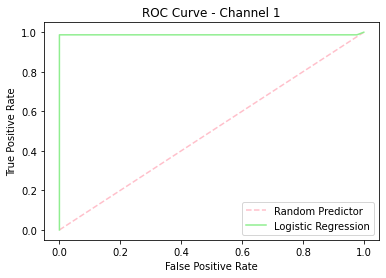

In [8]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure()
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='pink', label='Random Predictor')
plt.plot(lr_fpr, lr_tpr, color='lightgreen', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Channel 1')
plt.legend()
plt.savefig('../figures/classification/logit_regr_ROC_ch1.pdf')
plt.show()

In [9]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Predictor: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

Random Predictor: ROC AUC=0.500
Logistic Regression: ROC AUC=0.987


In [10]:
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
# predict class values
yhat = model.predict(X_test_ch)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.992 auc=0.987


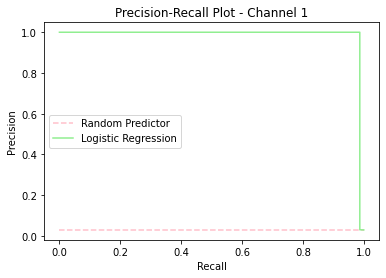

In [11]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='pink', linestyle='--', label='Random Predictor')
plt.plot(lr_recall, lr_precision, color='lightgreen', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Plot - Channel 1')
# show the legend
plt.legend()
plt.savefig('../figures/classification/logit_regr_PR_ch1.pdf')
# show the plot
plt.show()

A precision-recall plot is more informative in our case as the classes are imbalanced. 

Source: [The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, (T. Saito et al., 2015 PLoS One)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/)

## Channel 20

In [12]:
# select channel 20
X_train_ch = X_train[: , 20, :]
X_test_ch = X_test[:, 20, :]
print(X_train_ch.shape, y_train.shape)
print(X_test_ch.shape, y_test.shape)

(2754, 2) (2754,)
(46818, 2) (46818,)


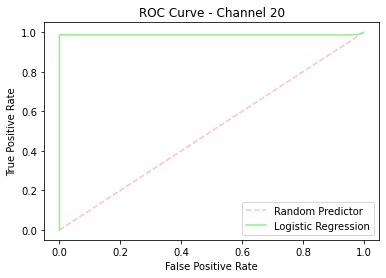

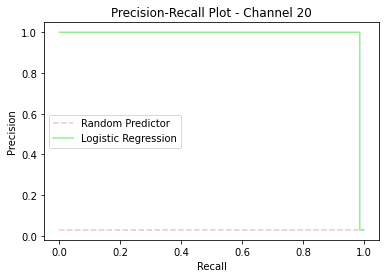

In [13]:
model = LogisticRegression(random_state=0)
model.fit(X_train_ch, y_train)

lr_probs = model.predict_proba(X_test_ch)
lr_probs = lr_probs[:, 1] # keep probabilities for the positive outcome only

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(X_test_ch))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure()
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='pink', label='Random Predictor')
plt.plot(lr_fpr, lr_tpr, color='lightgreen', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Channel 20')
plt.legend()
plt.savefig('../figures/classification/logit_regr_ROC_ch20.pdf')
plt.show()


# plot the precision-recall curves
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='pink', linestyle='--', label='Random Predictor')
plt.plot(lr_recall, lr_precision, color='lightgreen', label='Logistic Regression')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Plot - Channel 20')
# show the legend
plt.legend()
plt.savefig('../figures/classification/logit_regr_PR_ch20.pdf')
# show the plot
plt.show()